In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [10]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
df.isnull().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

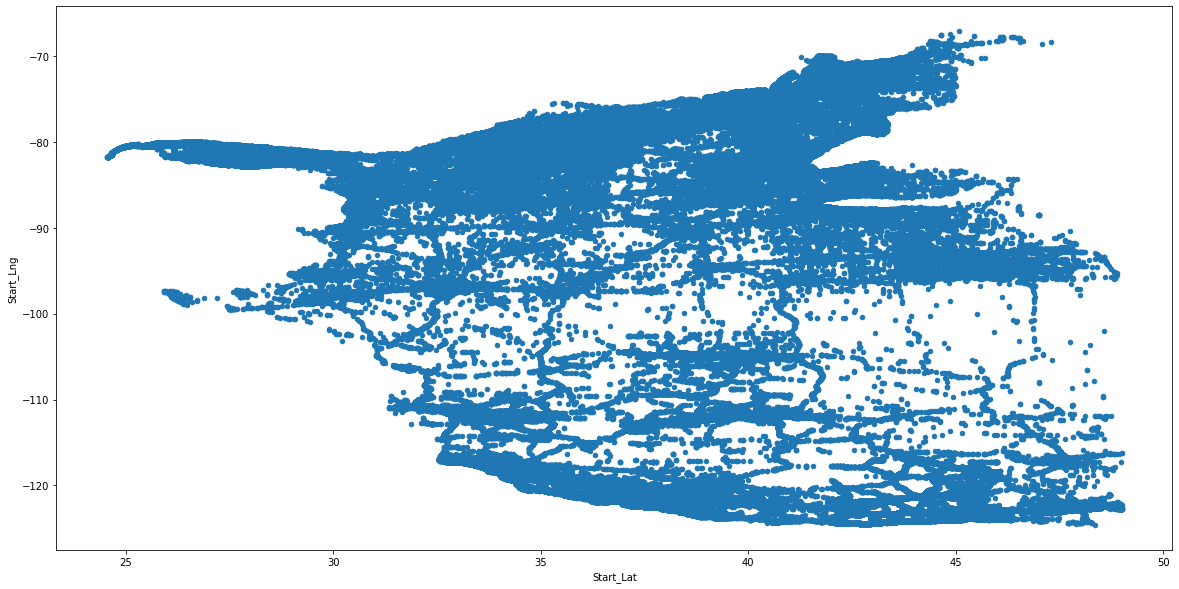

In [17]:
df.plot(x="Start_Lat", y="Start_Lng", kind="scatter", figsize=(20, 10))

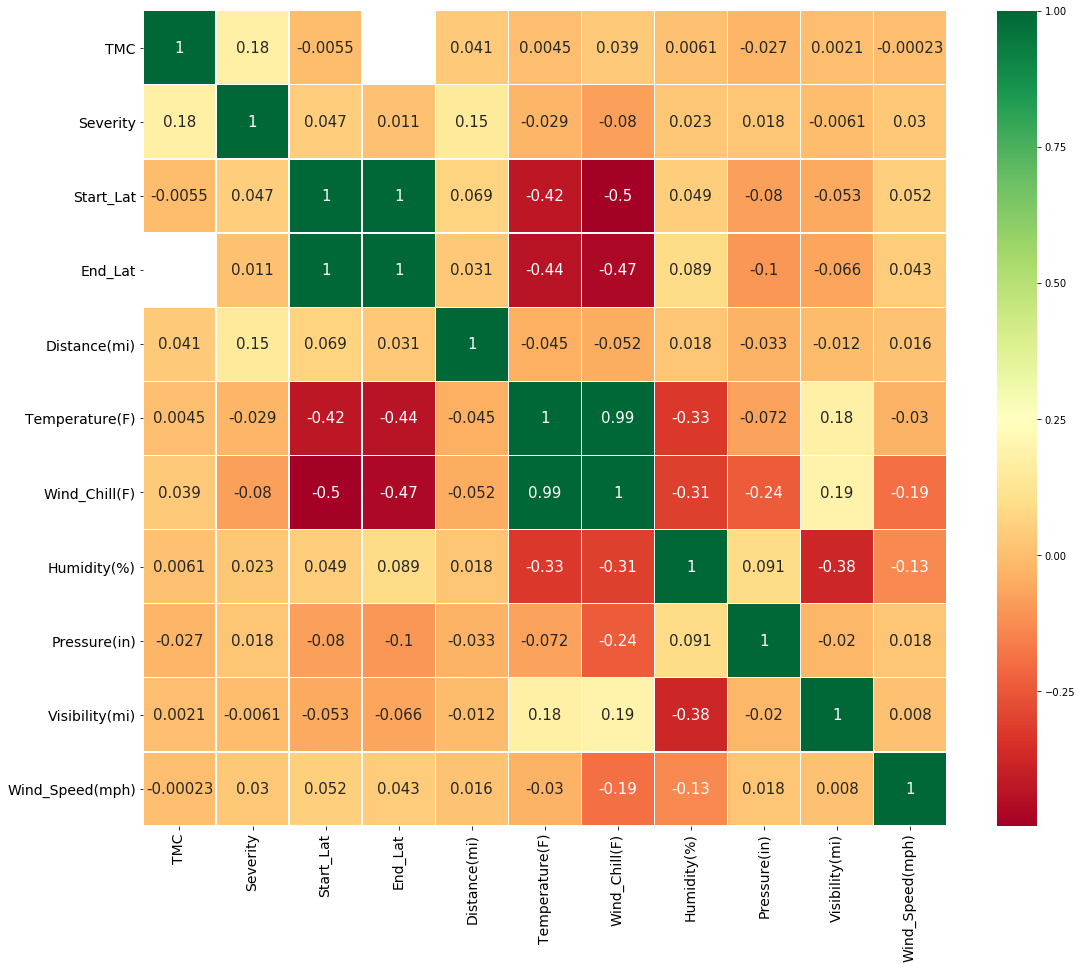

In [15]:
fig=sns.heatmap(df[['TMC','Severity','Start_Lat','End_Lat','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

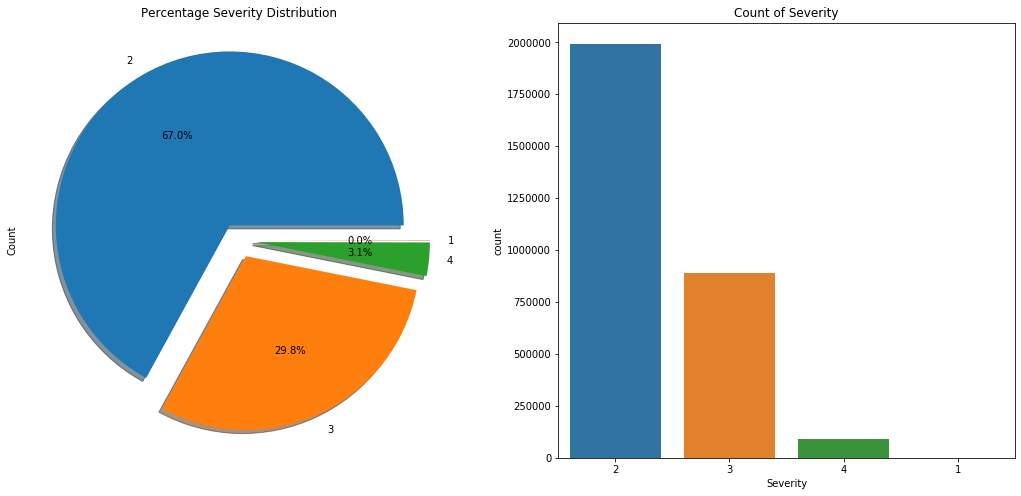

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Severity'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

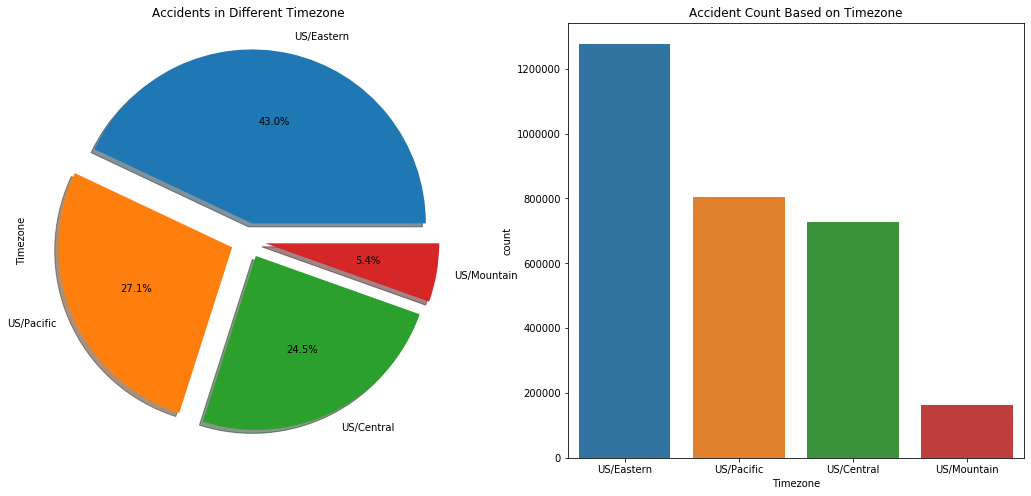

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Timezone'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Accidents in Different Timezone')
sns.countplot('Timezone',data=df,ax=ax[1],order=df['Timezone'].value_counts().index)
ax[1].set_title('Accident Count Based on Timezone')
plt.show()

In [24]:
df['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'MN', 'OK', 'LA',
       'TN', 'UT', 'CO', 'AZ', 'NV', 'KS', 'MS', 'NM', 'ME', 'AR', 'WY',
       'VT', 'ID', 'ND', 'MT', 'SD'], dtype=object)

Text(0, 0.5, '')

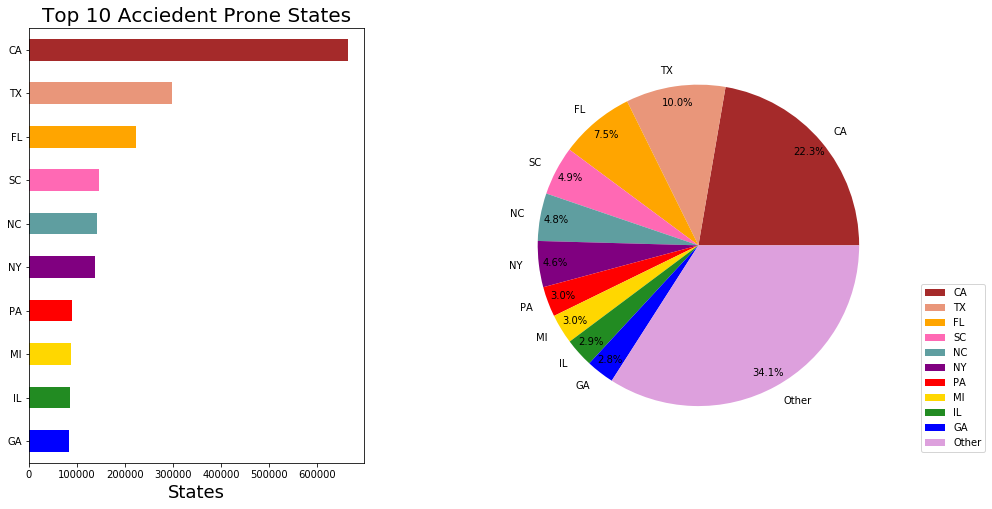

In [25]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Acciedent Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=df['State'].value_counts()
groups=list(df['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

In [26]:
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()

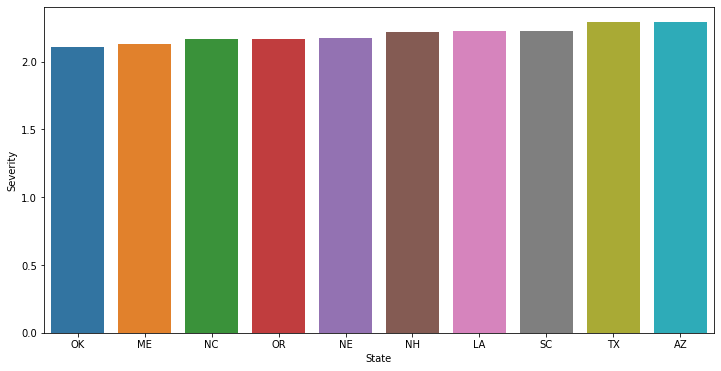

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State.head(10))
plt.ioff()

In [29]:
df1=df

In [30]:
df1['time'] = pd.to_datetime(df1.Start_Time, format='%Y-%m-%d %H:%M:%S')
df1 = df1.set_index('time')
df1.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


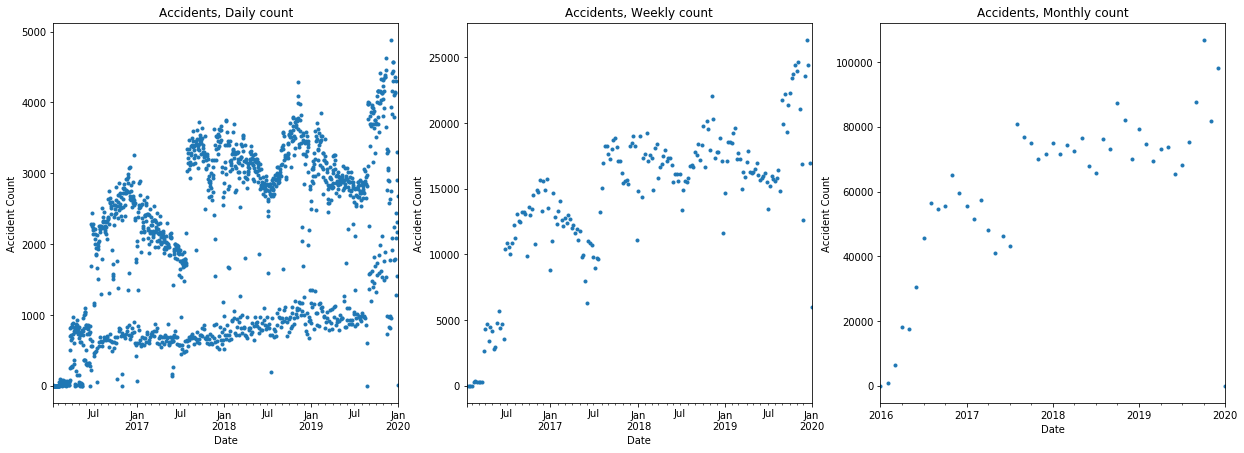

In [38]:
freq_text = {'D':'Daily','W':'Weekly','M':'Monthly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df1.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

In [39]:
df1=df
df1['Start_Time'] = pd.to_datetime(df1['Start_Time'], format="%Y/%m/%d %H:%M:%S")
df1['DayOfWeekNum'] = df1['Start_Time'].dt.dayofweek
df1['DayOfWeek'] = df1['Start_Time'].dt.weekday_name
df1['MonthDayNum'] = df1['Start_Time'].dt.day
df1['HourOfDay'] = df1['Start_Time'].dt.hour
df1.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,time,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,Night,Night,Night,Night,2016-02-08 05:46:00,0,Monday,8,5
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,Night,Night,Night,Day,2016-02-08 06:07:59,0,Monday,8,6
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,Night,Night,Day,Day,2016-02-08 06:49:27,0,Monday,8,6
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,Night,Day,Day,Day,2016-02-08 07:23:34,0,Monday,8,7
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,Day,Day,Day,Day,2016-02-08 07:39:07,0,Monday,8,7


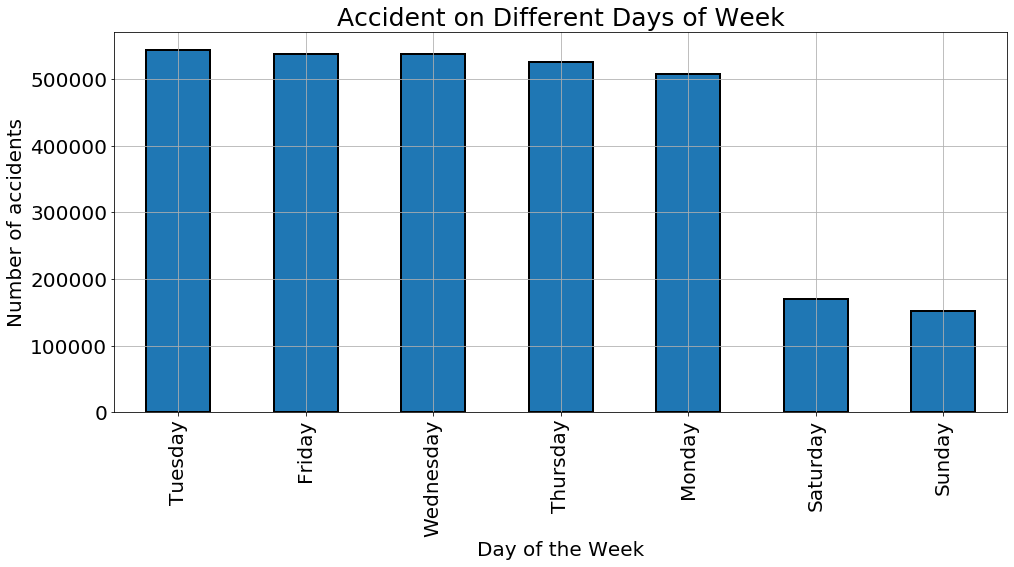

In [40]:
fig, ax=plt.subplots(figsize=(16,7))
df1['DayOfWeek'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day of the Week',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Days of Week',fontsize=25)
plt.grid()
plt.ioff()

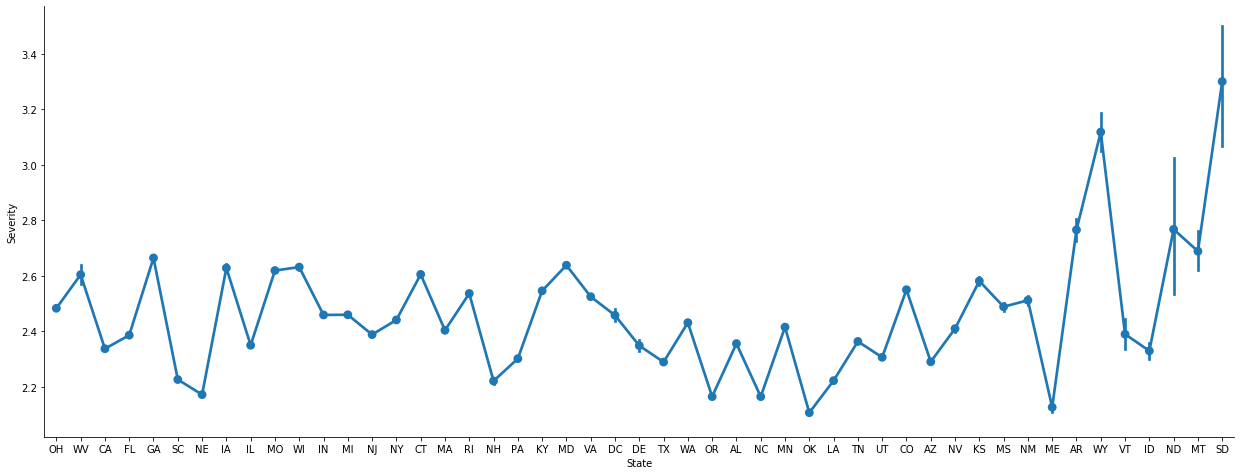

In [43]:
sns.factorplot('State','Severity',data=df)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

<Figure size 1440x720 with 0 Axes>

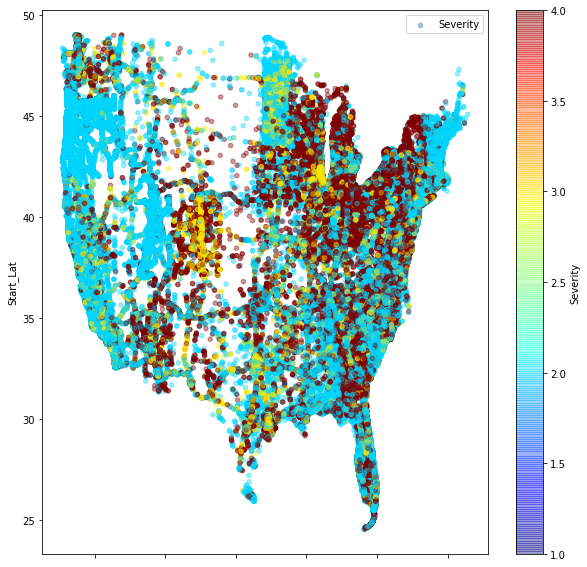

In [8]:
plt.figure(figsize=(20,10))
sub_6=df[df.Severity<5]
viz_4=sub_6.plot(kind='scatter', x='Start_Lng',y='Start_Lat',label='Severity',c='Severity',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
viz_4.legend()
plt.ioff()

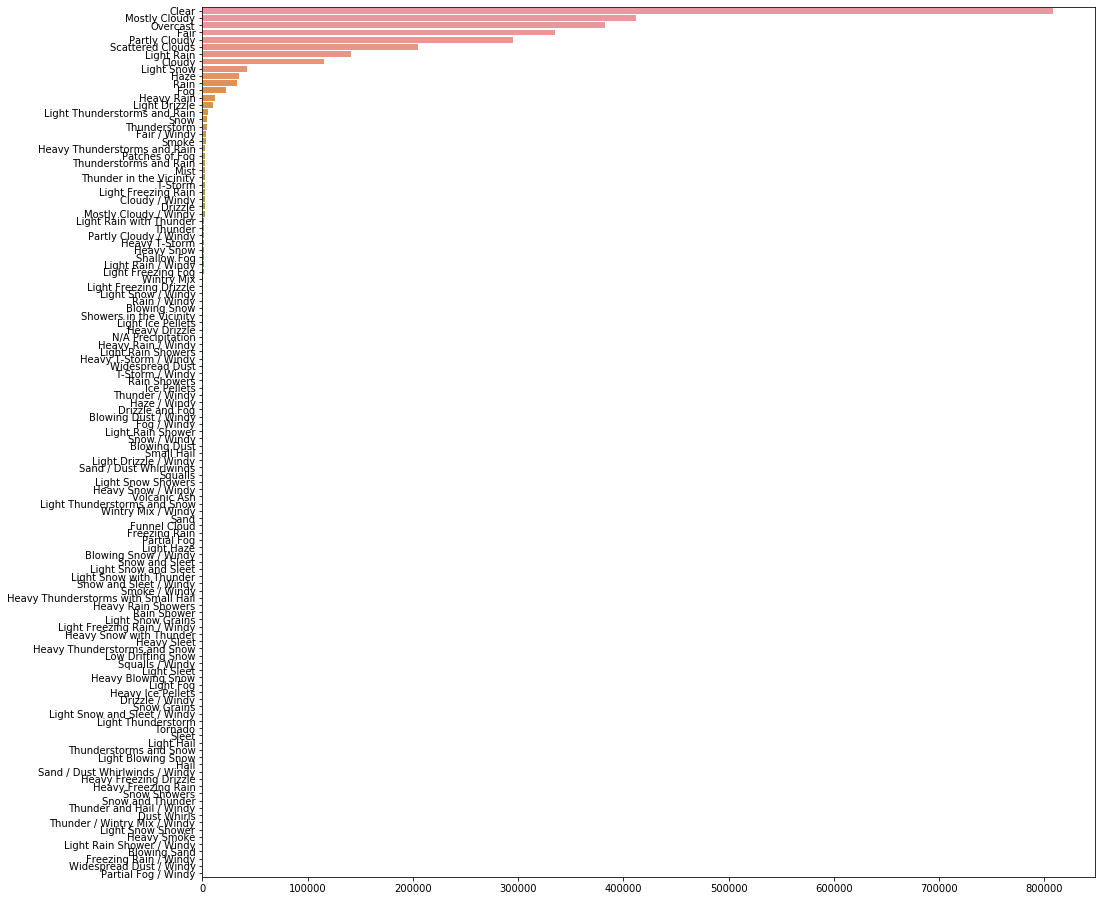

In [10]:
Weather = df.Weather_Condition.value_counts()
plt.figure(figsize=(16, 16))
sns.barplot(Weather.values, Weather.index)

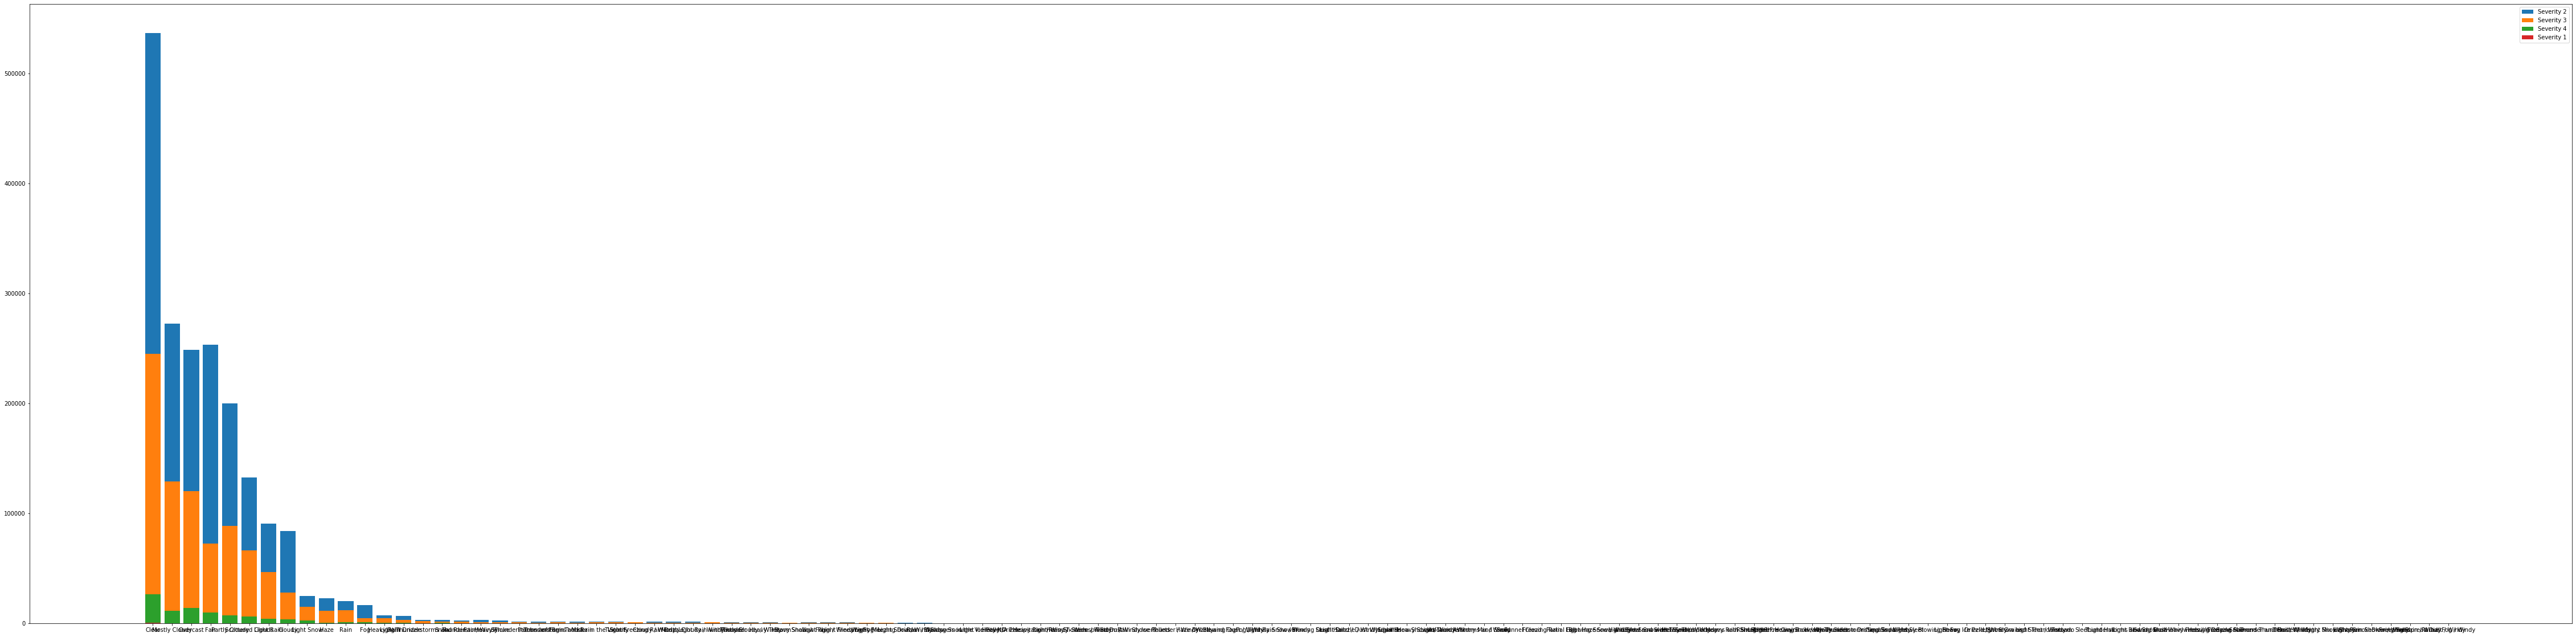

In [12]:
data=df

severity_1_by_Weather = []
severity_2_by_Weather = []
severity_3_by_Weather = []
severity_4_by_Weather = []
for i in Weather.index:
    severity_1_by_Weather.append(data[(data['Severity']==1)&(data['Weather_Condition']==i)].count()['ID'])
    severity_2_by_Weather.append(data[(data['Severity']==2)&(data['Weather_Condition']==i)].count()['ID'])
    severity_3_by_Weather.append(data[(data['Severity']==3)&(data['Weather_Condition']==i)].count()['ID'])
    severity_4_by_Weather.append(data[(data['Severity']==4)&(data['Weather_Condition']==i)].count()['ID'])
    
plt.figure(figsize=(80, 20))

plt.bar(Weather.index, severity_2_by_Weather, label='Severity 2')
plt.bar(Weather.index, severity_3_by_Weather, label='Severity 3')
plt.bar(Weather.index, severity_4_by_Weather, label='Severity 4')
plt.bar(Weather.index, severity_1_by_Weather, label='Severity 1')
plt.legend()

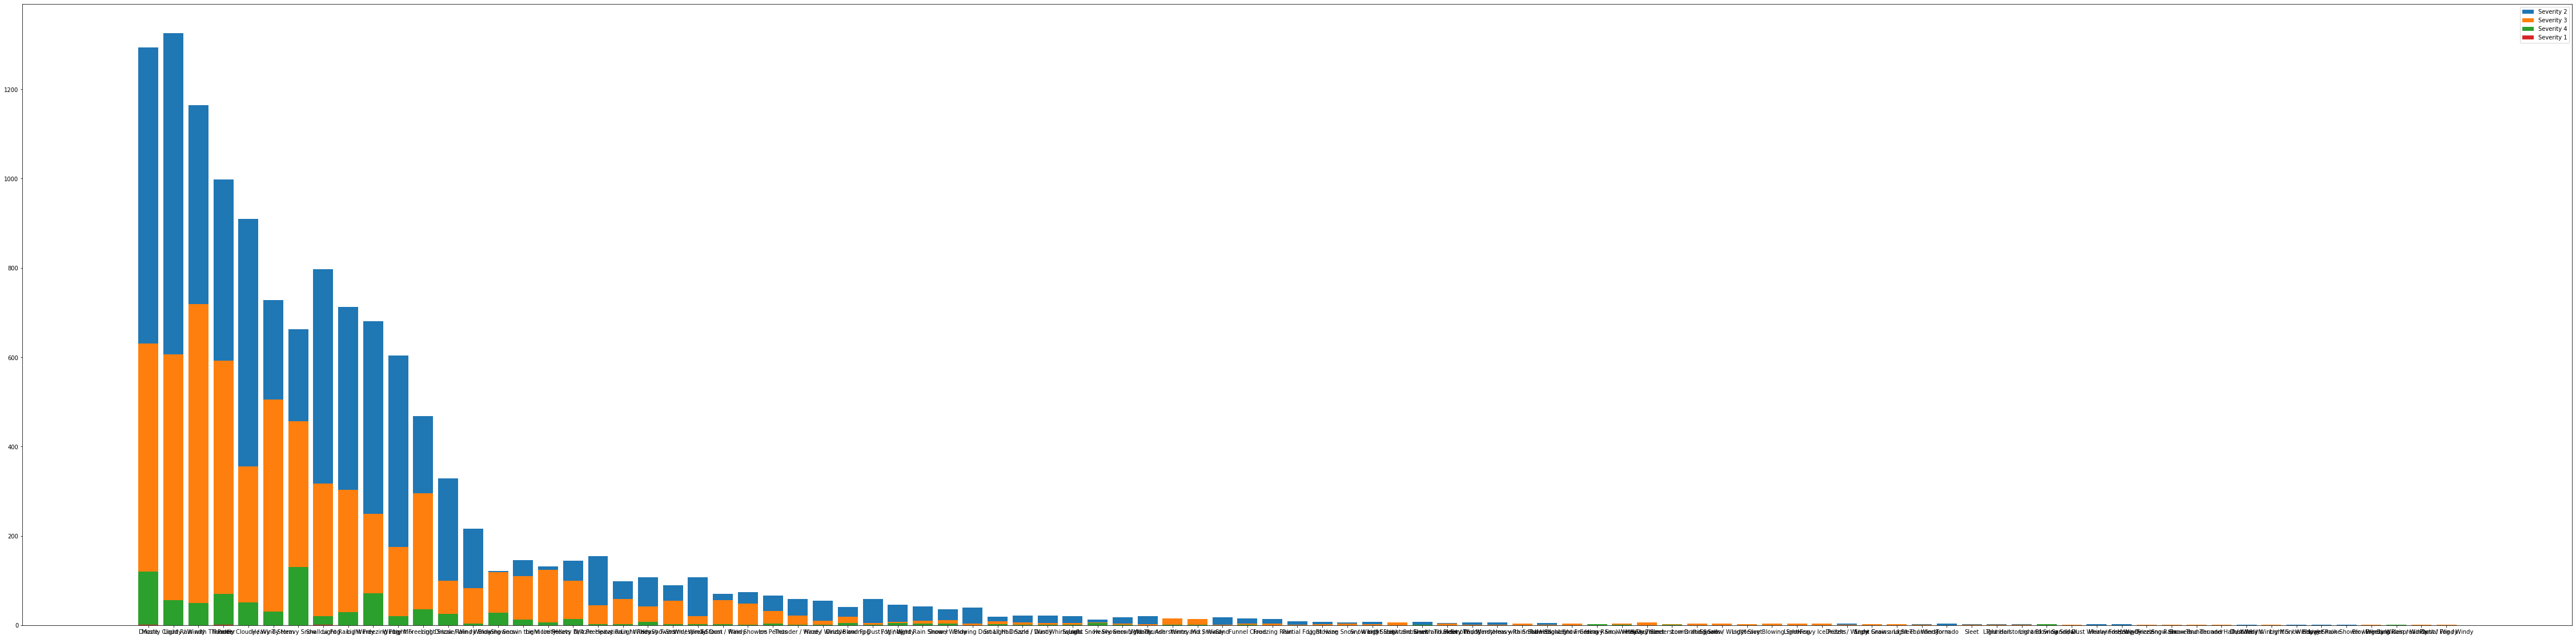

In [13]:
plt.figure(figsize=(80, 20))

plt.bar(Weather.index[27:], severity_2_by_Weather[27:], label='Severity 2')
plt.bar(Weather.index[27:], severity_3_by_Weather[27:], label='Severity 3')
plt.bar(Weather.index[27:], severity_4_by_Weather[27:], label='Severity 4')
plt.bar(Weather.index[27:], severity_1_by_Weather[27:], label='Severity 1')
plt.legend()


In [14]:
percentage_severity_1 = []
percentage_severity_2 = []
percentage_severity_3 = []
percentage_severity_4 = []
for i in range(len(severity_1_by_Weather)):
    percentage_severity_1.append((severity_1_by_Weather[i]/Weather[i])*100)
    percentage_severity_2.append((severity_2_by_Weather[i]/Weather[i])*100)
    percentage_severity_3.append((severity_3_by_Weather[i]/Weather[i])*100)
    percentage_severity_4.append((severity_4_by_Weather[i]/Weather[i])*100)

In [15]:
percentage_severity_3[1]+percentage_severity_2[1]+percentage_severity_1[1]+percentage_severity_4[1]

100.0

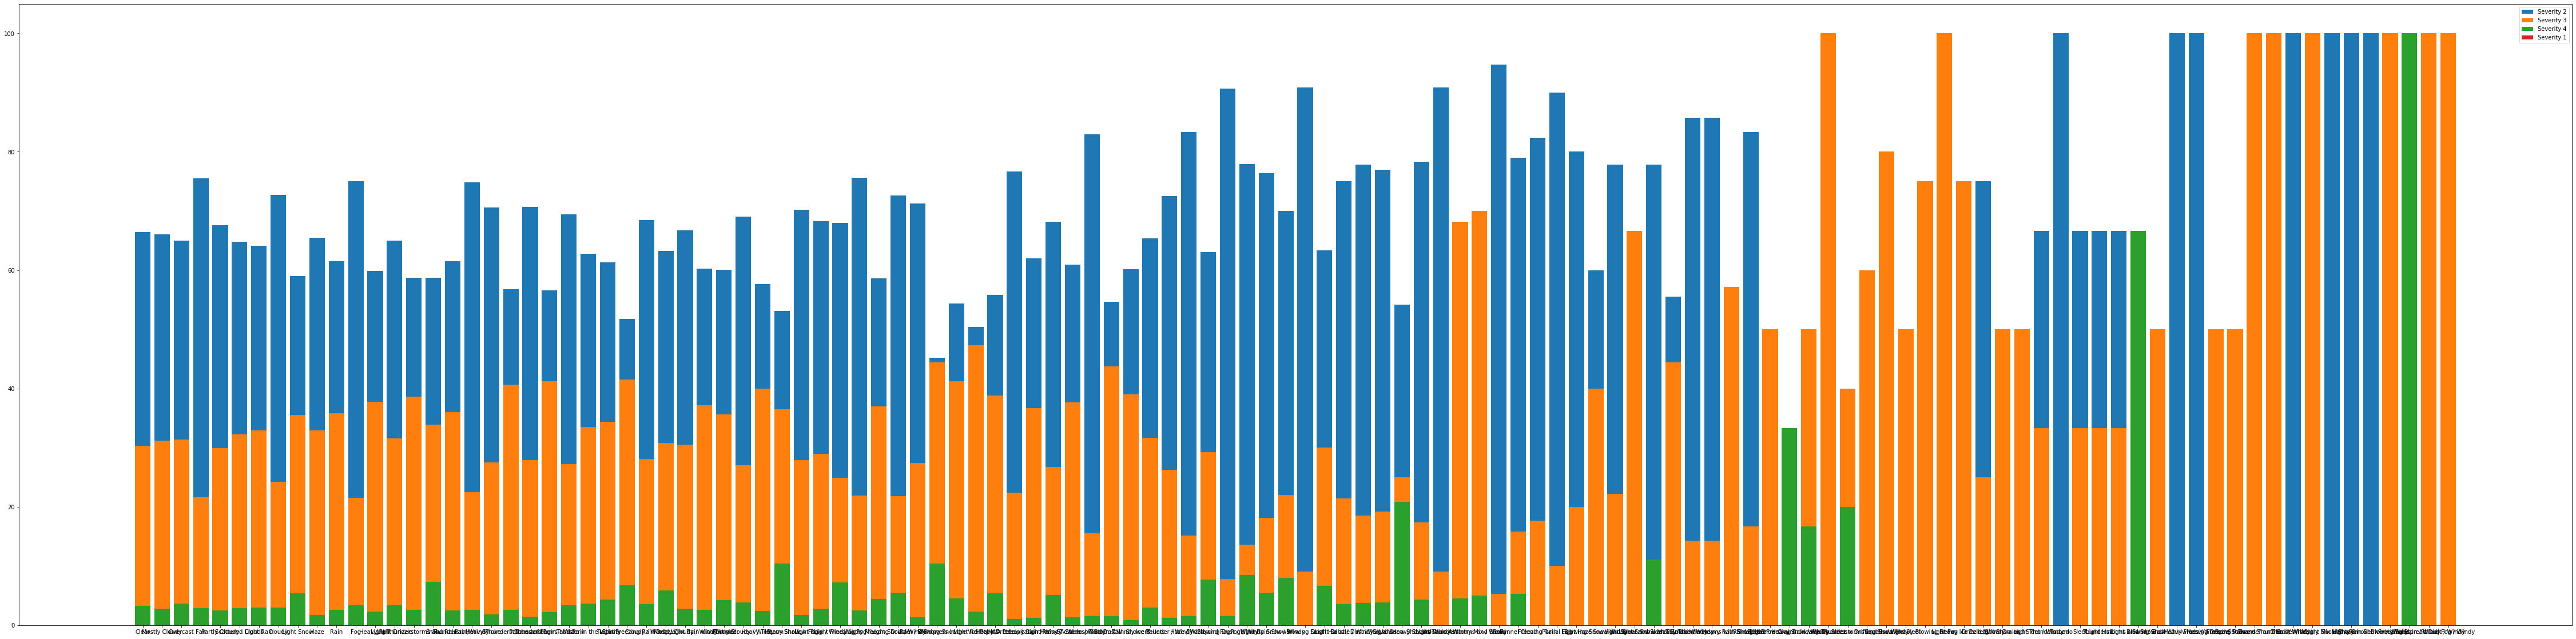

In [16]:
plt.figure(figsize=(80, 20))

plt.bar(Weather.index, percentage_severity_2, label='Severity 2')
plt.bar(Weather.index, percentage_severity_3, label='Severity 3')
plt.bar(Weather.index, percentage_severity_4, label='Severity 4')
plt.bar(Weather.index, percentage_severity_1, label='Severity 1')
plt.legend()